In [1]:
#Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium, json

# **Initial data loading and analysis**

In [2]:
data = pd.read_csv("../Data/raw/weather/weather.csv")
#Loading the data as a pandas dataframe

In [3]:
# Print the number of rows and columns
row, cols = data.shape

print("Number of Rows: " + str(row))
print("Number of Columns: " + str(cols))

Number of Rows: 20220
Number of Columns: 9


In [4]:
# make a sanity check: are there missing values anywhere in the weather data?
print(data.isnull().any())
print("\n""There are no missing values in the dataset!" if not data.isnull().any().any() 
        else "There are missing values in the dataset")

date                       False
iso3166-2                  False
RelativeHumiditySurface    False
SolarRadiation             False
Surfacepressure            False
TemperatureAboveGround     False
Totalprecipitation         False
UVIndex                    False
WindSpeed                  False
dtype: bool

There are no missing values in the dataset!


In [5]:
#Making a dataset that only contains weatherdata from Germany
is_DE = data[data['iso3166-2'].str.startswith('DE')]
is_DE

,date,iso3166-2,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
0,2020-02-13,DE-BB,76.337444,1.824290e+06,2.403341e+06,276.551573,0.003355,2.777806,4.542822
1,2020-02-13,DE-BE,76.065297,1.786373e+06,2.408182e+06,276.844633,0.003523,4.671329,4.761509
2,2020-02-13,DE-BW,80.113988,1.505760e+06,2.290158e+06,276.227143,0.008013,4.268546,4.467024
3,2020-02-13,DE-BY,81.554346,2.363013e+06,2.275361e+06,275.583053,0.005227,4.417797,3.677414
4,2020-02-13,DE-HB,87.167414,8.389756e+03,2.406940e+06,276.237452,0.007715,1.794872,4.699573
...,...,...,...,...,...,...,...,...,...
20182,2021-02-21,DE-SH,78.077610,5.698494e+06,2.431487e+06,281.943486,0.000000,4.474084,2.532838
20183,2021-02-21,DE-SL,60.483775,8.762859e+06,2.350492e+06,283.516066,0.000000,8.000000,3.247090
20184,2021-02-21,DE-SN,74.638170,6.687276e+06,2.363996e+06,279.277820,0.000008,5.409593,4.648033
20185,2021-02-21,DE-ST,69.587170,7.276057e+06,2.408002e+06,282.418775,0.000000,5.273630,2.972845


In [6]:
#Making a dataset grouped by region aggregated by min, mean, median and max
weather_by_region = is_DE.groupby(by="iso3166-2").agg(["min","mean","median","max"])
weather_by_region

RelativeHumiditySurface                                   \
                              min       mean     median        max   
iso3166-2                                                            
DE-BB                   40.944275  73.197159  75.062729  95.670552   
DE-BE                   36.394493  70.927588  73.183799  96.765616   
DE-BW                   37.747618  73.226322  76.292674  95.498845   
DE-BY                   39.455378  75.722405  78.193325  96.075074   
DE-HB                   38.790813  75.872220  76.660684  97.059826   
DE-HE                   38.959564  73.761320  76.401262  96.396279   
DE-HH                   38.394035  75.310771  76.310070  96.224585   
DE-MV                   45.846816  77.065302  77.760510  96.738838   
DE-NI                   41.061156  75.742229  77.176560  96.765612   
DE-NW                   36.894013  73.738510  75.733194  94.962399   
DE-RP                   35.617348  73.339164  75.727323  97.129291   
DE-SH                   44.382846  78.629833  79.631934  98.258213   
DE-SL                   33.880265  73.517707  76.365296  98.264247   
DE-SN                   40.675136  73.159969  75.280010  97.317702   
DE-ST                   41.528385  72.072545  73.903314  96.198709   
DE-TH                   43.528424  74.030870  76.157578  96.081521   

          SolarRadiation                                            \
                     min          mean        median           max   
iso3166-2                                                            
DE-BB          17.559320  6.367783e+06  4.197652e+06  2.217237e+07   
DE-BE           0.000000  6.355187e+06  4.107723e+06  2.225569e+07   
DE-BW        2439.200721  7.594820e+06  5.321531e+06  2.370823e+07   
DE-BY       17657.696781  7.197036e+06  5.288836e+06  2.219912e+07   
DE-HB         153.793102  6.299325e+06  4.349558e+06  2.300917e+07   
DE-HE        1230.812149  6.687323e+06  4.306662e+06  2.294842e+07   
DE-HH           5.499092  6.372676e+06  4.338788e+06  2.308893e+07   
DE-MV          48.725902  6.532515e+06  4.351509e+06  2.261007e+07   
DE-NI        1952.082956  6.342418e+06  4.444657e+06  2.279442e+07   
DE-NW         337.114223  6.607485e+06  4.408154e+06  2.309114e+07   
DE-RP         755.321873  7.048611e+06  4.706654e+06  2.347276e+07   
DE-SH         419.177338  6.544449e+06  4.439825e+06  2.286818e+07   
DE-SL         172.060835  7.312995e+06  4.883696e+06  2.362508e+07   
DE-SN          41.484080  6.626296e+06  4.563007e+06  2.221355e+07   
DE-ST         108.246092  6.442019e+06  4.923106e+06  2.262710e+07   
DE-TH         138.681558  6.522433e+06  4.620141e+06  2.276120e+07   

          Surfacepressure                ... Totalprecipitation            \
                      min          mean  ...             median       max   
iso3166-2                                ...                                
DE-BB        2.343446e+06  2.417385e+06  ...           0.000482  0.024186   
DE-BE        2.348335e+06  2.422096e+06  ...           0.000313  0.027601   
DE-BW        2.222697e+06  2.302639e+06  ...           0.000831  0.026674   
DE-BY        2.212828e+06  2.287627e+06  ...           0.001066  0.024840   
DE-HB        2.347524e+06  2.430640e+06  ...           0.000652  0.023294   
DE-HE        2.267376e+06  2.350135e+06  ...           0.000722  0.019356   
DE-HH        2.345799e+06  2.426230e+06  ...           0.000561  0.022043   
DE-MV        2.350453e+06  2.424651e+06  ...           0.000640  0.016887   
DE-NI        2.332397e+06  2.414608e+06  ...           0.000909  0.018432   
DE-NW        2.299458e+06  2.385365e+06  ...           0.001085  0.019498   
DE-RP        2.261111e+06  2.346301e+06  ...           0.000776  0.020001   
DE-SH        2.348735e+06  2.428378e+06  ...           0.000722  0.017386   
DE-SL        2.262675e+06  2.348339e+06  ...           0.000561  0.026162   
DE-SN        2.277932e+06  2.353212e+06  ...           0.000654  0.031971   
DE-ST        2.323452e+06  2.401556e+06

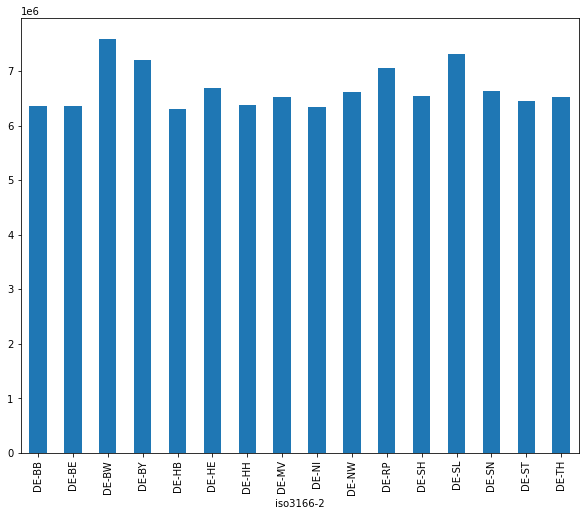

In [7]:
#Plotting the mean SolarRadiation by region as a barplot
weather_by_region["SolarRadiation"]["mean"].plot.bar(figsize=(10,8));


In [8]:
#Making a dataset that is grouped by date and aggregated only by the mean values
date_agg = is_DE.groupby(by="date").agg(["mean"])
date_agg

,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
,mean,mean,mean,mean,mean,mean,mean
date,,,,,,,
2020-02-13,83.550416,9.232296e+05,2.361713e+06,276.080346,5.424938e-03,3.045868,4.677214
2020-02-14,87.038057,1.189954e+06,2.385722e+06,277.740734,1.314437e-03,1.875386,3.260335
2020-02-15,78.429711,2.849352e+06,2.388378e+06,279.481576,1.507500e-04,3.958054,4.619486
2020-02-16,63.587472,7.130768e+05,2.360307e+06,284.575068,4.384375e-03,3.224329,7.988258
2020-02-17,73.292063,1.628548e+06,2.373769e+06,280.940914,3.835563e-03,3.951442,6.621854
...,...,...,...,...,...,...,...
2021-02-17,88.572442,1.161559e+06,2.382257e+06,278.646276,1.361375e-03,2.553174,4.053323
2021-02-18,81.035245,2.263309e+06,2.377988e+06,279.161078,2.961500e-03,4.127690,3.631289


In [ ]:
#Plotting the mean SolarRadiation by date as a lineplot
date_agg["SolarRadiation"]["mean"][:10].plot.line(figsize=(6,6));

In [ ]:
Covid_Weather_Merged = pd.merge()